#BOOK 1: Chapter 11 Implement Decision Tree 

Gini Index

In [1]:
# Example of calculating Gini index - cost function used to evaluate splits in the dataset.
# Gini score gives an idea of how good a split is 
# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
  # count all samples at split point
  n_instances = float(sum([len(group) for group in groups]))
  # sum weighted Gini index for each group
  gini = 0.0
  for group in groups:
    size = float(len(group))
    # avoid divide by zero
    if size == 0:
      continue
    score = 0.0
    # score the group based on the score for each class
    for class_val in classes:
      p = [row[-1] for row in group].count(class_val) / size
      score += p * p
    # weight the group score by its relative size
    gini += (1.0 - score) * (size / n_instances)
  return gini

# test Gini values
print(gini_index([[[1, 1], [1, 0]], [[1, 1], [1, 0]]], [0, 1]))
print(gini_index([[[1, 0], [1, 0]], [[1, 1], [1, 1]]], [0, 1]))

0.5
0.0


Create Split

X1 < 2.771 Gini=0.444
X1 < 1.729 Gini=0.500
X1 < 3.678 Gini=0.286
X1 < 3.961 Gini=0.167
X1 < 2.999 Gini=0.375
X1 < 7.498 Gini=0.286
X1 < 9.002 Gini=0.375
X1 < 7.445 Gini=0.167
X1 < 10.125 Gini=0.444
X1 < 6.642 Gini=0.000
X2 < 1.785 Gini=0.500
X2 < 1.170 Gini=0.444
X2 < 2.813 Gini=0.320
X2 < 2.620 Gini=0.417
X2 < 2.209 Gini=0.476
X2 < 3.163 Gini=0.167
X2 < 3.339 Gini=0.444
X2 < 0.477 Gini=0.500
X2 < 3.235 Gini=0.286
X2 < 3.320 Gini=0.375
Split: [X1 < 6.642]


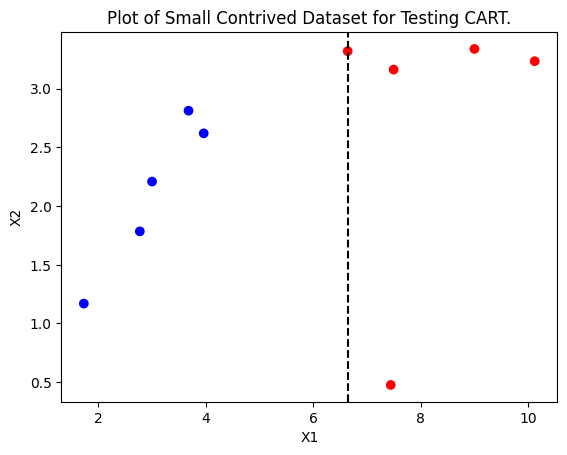

In [30]:
#Example of getting the best split

# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
  left, right = list(), list()
  for row in dataset:
    if row[index] < value:
      left.append(row)
    else:
      right.append(row)
  return left, right

# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
  # count all samples at split point
  n_instances = float(sum([len(group) for group in groups]))
  # sum weighted Gini index for each group
  gini = 0.0
  for group in groups:
    size = float(len(group))
    # avoid divide by zero
    if size == 0:
      continue
    score = 0.0
    # score the group based on the score for each class
    for class_val in classes:
      p = [row[-1] for row in group].count(class_val) / size
      score += p * p
      # weight the group score by its relative size
    gini += (1.0 - score) * (size / n_instances)
  return gini

# Select the best split point for a dataset
def get_split(dataset):
  class_values = list(set(row[-1] for row in dataset))
  b_index, b_value, b_score, b_groups = 999, 999, 999, None
  for index in range(len(dataset[0])-1):
    for row in dataset:
      groups = test_split(index, row[index], dataset)
      gini = gini_index(groups, class_values)
      print('X%d < %.3f Gini=%.3f' % ((index+1), row[index], gini))
      if gini < b_score:
        b_index, b_value, b_score, b_groups = index, row[index], gini, groups
  return {'index':b_index, 'value':b_value, 'groups':b_groups}

# Test getting the best split
dataset = [[2.771244718,1.784783929,0],
  [1.728571309,1.169761413,0],
  [3.678319846,2.81281357,0],
  [3.961043357,2.61995032,0],
  [2.999208922,2.209014212,0],
  [7.497545867,3.162953546,1],
  [9.00220326,3.339047188,1],
  [7.444542326,0.476683375,1],
  [10.12493903,3.234550982,1],
  [6.642287351,3.319983761,1]]
split = get_split(dataset)
print('Split: [X%d < %.3f]' % ((split['index']+1), split['value']))


import matplotlib.pyplot as plt
# define the split
split_feature_idx = 0  # split on feature X1
split_feature_val = 6.642
left_class = 0
right_class = 1

# prepare data for plotting
x1 = [row[0] for row in dataset]
x2 = [row[1] for row in dataset]
colors = ['blue' if row[2] == 0 else 'red' for row in dataset]

# plot the data points
plt.scatter(x1, x2, c=colors)

# draw the split boundary
plt.axvline(x=split_feature_val, linestyle='--', color='black')

# add labels and title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Plot of Small Contrived Dataset for Testing CART.')

# show the plot
plt.show()


Build a Tree

In [23]:
# Example of building a tree
# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
  left, right = list(), list()
  for row in dataset:
    if row[index] < value:
      left.append(row)
    else:
      right.append(row)
  return left, right

# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
  # count all samples at split point
  n_instances = float(sum([len(group) for group in groups]))
  # sum weighted Gini index for each group
  gini = 0.0
  for group in groups:
    size = float(len(group))
    # avoid divide by zero
    if size == 0:
      continue
    score = 0.0
    # score the group based on the score for each class
    for class_val in classes:
      p = [row[-1] for row in group].count(class_val) / size
      score += p * p
      # weight the group score by its relative size
    gini += (1.0 - score) * (size / n_instances)
  return gini

# Select the best split point for a dataset
def get_split(dataset):
  class_values = list(set(row[-1] for row in dataset))
  b_index, b_value, b_score, b_groups = 999, 999, 999, None
  for index in range(len(dataset[0])-1):
    for row in dataset:
      groups = test_split(index, row[index], dataset)
      gini = gini_index(groups, class_values)
      # print('X%d < %.3f Gini=%.3f' % ((index+1), row[index], gini))
      if gini < b_score:
        b_index, b_value, b_score, b_groups = index, row[index], gini, groups
  return {'index':b_index, 'value':b_value, 'groups':b_groups}

# Build a Tree
# Create a terminal node value
def to_terminal(group):
  outcomes = [row[-1] for row in group]
  # returns most common output value in a list of rows
  return max(set(outcomes), key=outcomes.count) 

# Recursive Splitting 
# Create child splits for a node or make terminal
def split(node, max_depth, min_size, depth):
  #1. The two groups of data split by the node are extracted for use and deleted from the node
  left, right = node['groups']
  del(node['groups'])
  
  #2. check for a no split (empty)
  if not left or not right:
    node['left'] = node['right'] = to_terminal(left + right)
    return
  
  # check for max depth - yes -> create a terminal node
  if depth >= max_depth:
    node['left'], node['right'] = to_terminal(left), to_terminal(right)
    return
  
  # process left child - if row too small -> create a terminal node
  if len(left) <= min_size:
    node['left'] = to_terminal(left)
  # else -> create and add the left node in a depth first fashion until bottom tree reached
  else:
    node['left'] = get_split(left)
    split(node['left'], max_depth, min_size, depth+1)
  
  # process right child
  if len(right) <= min_size:
    node['right'] = to_terminal(right)
  else:
    node['right'] = get_split(right)
    split(node['right'], max_depth, min_size, depth+1)

# Build a decision tree -> create root node and call split()
# calls itself recursively to build the whole tree
def build_tree(train, max_depth, min_size):
  root = get_split(train)
  split(root, max_depth, min_size, 1)
  return root

# Print a decision tree -> recursively prints out nodes of the decision tree with one line per node
# Print a decision tree
def print_tree(node, depth=0):
  if isinstance(node, dict):
    print('%s[X%d < %.3f]' % ((depth*' ', (node['index']+1), node['value'])))
    print_tree(node['left'], depth+1)
    print_tree(node['right'], depth+1)
  else:
    print('%s[%s]' % ((depth*' ', node)))

dataset = [[2.771244718,1.784783929,0],
[1.728571309,1.169761413,0],
[3.678319846,2.81281357,0],
[3.961043357,2.61995032,0],
[2.999208922,2.209014212,0],
[7.497545867,3.162953546,1],
[9.00220326,3.339047188,1],
[7.444542326,0.476683375,1],
[10.12493903,3.234550982,1],
[6.642287351,3.319983761,1]]
print('Maximum depth=1, tree with one node -> decision stump')
tree = build_tree(dataset, 1, 1)
print_tree(tree)
print('\n Maximum depth=2, force tree to make splits')
tree = build_tree(dataset, 2, 1)
print_tree(tree)
print('\n Maximum depth=3, force one more level of splits')
tree = build_tree(dataset, 3, 1)
print_tree(tree)

Maximum depth=1, tree with one node -> decision stump
[X1 < 6.642]
 [0]
 [1]

 Maximum depth=2, force tree to make splits
[X1 < 6.642]
 [X1 < 2.771]
  [0]
  [0]
 [X1 < 7.498]
  [1]
  [1]

 Maximum depth=3, force one more level of splits
[X1 < 6.642]
 [X1 < 2.771]
  [0]
  [X1 < 2.771]
   [0]
   [0]
 [X1 < 7.498]
  [X1 < 7.445]
   [1]
   [1]
  [X1 < 7.498]
   [1]
   [1]


Make Prediction

In [8]:
# Example of making predictions
# Make a prediction with a decision tree
def predict(node, row):
  if row[node['index']] < node['value']:
    if isinstance(node['left'], dict):
      return predict(node['left'], row)
    else:
      return node['left']
  else:
    if isinstance(node['right'], dict):
      return predict(node['right'], row)
    else:
      return node['right']

# contrived dataset
dataset = [[2.771244718,1.784783929,0],
  [1.728571309,1.169761413,0],
  [3.678319846,2.81281357,0],
  [3.961043357,2.61995032,0],
  [2.999208922,2.209014212,0],
  [7.497545867,3.162953546,1],
  [9.00220326,3.339047188,1],
  [7.444542326,0.476683375,1],
  [10.12493903,3.234550982,1],
  [6.642287351,3.319983761,1]]

# predict with a stump
stump = {'index': 0, 'right': 1, 'value': 6.642287351, 'left': 0}
for row in dataset:
  prediction = predict(stump, row)
  print('Expected=%d, Got=%d' % (row[-1], prediction))

Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1


Banknote Case Study

In [9]:
# Example of CART on the Banknote dataset
from random import seed
from random import randrange
from csv import reader

# Load a CSV file
def load_csv(filename):
  dataset = list()
  with open(filename, 'r') as file:
    csv_reader = reader(file)
    for row in csv_reader:
      if not row:
        continue
      dataset.append(row)
  return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
  for row in dataset:
    row[column] = float(row[column].strip())

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
  dataset_split = list()
  dataset_copy = list(dataset)
  fold_size = int(len(dataset) / n_folds)
  for _ in range(n_folds):
    fold = list()
    while len(fold) < fold_size:
      index = randrange(len(dataset_copy))
      fold.append(dataset_copy.pop(index))
    dataset_split.append(fold)
  return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
  correct = 0
  for i in range(len(actual)):
    if actual[i] == predicted[i]:
      correct += 1
  return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
  folds = cross_validation_split(dataset, n_folds)
  scores = list()
  for fold in folds:
    train_set = list(folds)
    train_set.remove(fold)
    train_set = sum(train_set, [])
    test_set = list()
    for row in fold:
      row_copy = list(row)
      test_set.append(row_copy)
      row_copy[-1] = None
    predicted = algorithm(train_set, test_set, *args)
    actual = [row[-1] for row in fold]
    accuracy = accuracy_metric(actual, predicted)
    scores.append(accuracy)
  return scores

# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
  left, right = list(), list()
  for row in dataset:
    if row[index] < value:
      left.append(row)
    else:
      right.append(row)
  return left, right

# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
  # count all samples at split point
  n_instances = float(sum([len(group) for group in groups]))
  # sum weighted Gini index for each group
  gini = 0.0
  for group in groups:
    size = float(len(group))
    # avoid divide by zero
    if size == 0:
      continue
    score = 0.0
    # score the group based on the score for each class
    for class_val in classes:
      p = [row[-1] for row in group].count(class_val) / size
      score += p * p
    # weight the group score by its relative size
    gini += (1.0 - score) * (size / n_instances)
  return gini

# Select the best split point for a dataset
def get_split(dataset):
  class_values = list(set(row[-1] for row in dataset))
  b_index, b_value, b_score, b_groups = 999, 999, 999, None
  for index in range(len(dataset[0])-1):
    for row in dataset:
      groups = test_split(index, row[index], dataset)
      gini = gini_index(groups, class_values)
      if gini < b_score:
        b_index, b_value, b_score, b_groups = index, row[index], gini, groups
  return {'index':b_index, 'value':b_value, 'groups':b_groups}

# Create a terminal node value
def to_terminal(group):
  outcomes = [row[-1] for row in group]
  return max(set(outcomes), key=outcomes.count)

# Create child splits for a node or make terminal
def split(node, max_depth, min_size, depth):
  left, right = node['groups']
  del(node['groups'])
  # check for a no split
  if not left or not right:
    node['left'] = node['right'] = to_terminal(left + right)
    return
  # check for max depth
  if depth >= max_depth:
    node['left'], node['right'] = to_terminal(left), to_terminal(right)
    return
  #process left child
  if len(left) <= min_size:
    node['left'] = to_terminal(left)
  else:
    node['left'] = get_split(left)
    split(node['left'], max_depth, min_size, depth+1)
  # process right child
  if len(right) <= min_size:
    node['right'] = to_terminal(right)
  else:
    node['right'] = get_split(right)
    split(node['right'], max_depth, min_size, depth+1)

# Build a decision tree
def build_tree(train, max_depth, min_size):
  root = get_split(train)
  split(root, max_depth, min_size, 1)
  return root

# Make a prediction with a decision tree
def predict(node, row):
  if row[node['index']] < node['value']:
    if isinstance(node['left'], dict):
      return predict(node['left'], row)
    else:
      return node['left']
  else:
    if isinstance(node['right'], dict):
      return predict(node['right'], row)
    else:
      return node['right']

# Classification and Regression Tree Algorithm
def decision_tree(train, test, max_depth, min_size):
  tree = build_tree(train, max_depth, min_size)
  predictions = list()
  for row in test:
    prediction = predict(tree, row)
    predictions.append(prediction)
  return(predictions)

# Test CART on Bank Note dataset
seed(1)
# load and prepare data
filename = 'data_banknote_authentication.csv'
dataset = load_csv(filename)
# convert string attributes to integers
for i in range(len(dataset[0])):
  str_column_to_float(dataset, i)
# evaluate algorithm
n_folds = 5
max_depth = 5
min_size = 10
scores = evaluate_algorithm(dataset, decision_tree, n_folds, max_depth, min_size)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))


Scores: [96.35036496350365, 97.08029197080292, 97.44525547445255, 98.17518248175182, 97.44525547445255]
Mean Accuracy: 97.299%


#Visualizing Decision Trees with Python (Scikit-learn, Graphviz, Matplotlib) <br>
https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc

In [22]:
#Import Libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

In [23]:
# Load The Dataset
import pandas as pd
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
# Splitting data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)
print("X_train:\n", X_train.head())
print("\nX_test:\n", X_test.head())
print("\nY_train:\n", Y_train.head())
print("\nY_test:\n", Y_test.head())

X_train:
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
61                 5.9               3.0                4.2               1.5
92                 5.8               2.6                4.0               1.2
112                6.8               3.0                5.5               2.1
2                  4.7               3.2                1.3               0.2
141                6.9               3.1                5.1               2.3

X_test:
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
114                5.8               2.8                5.1               2.4
62                 6.0               2.2                4.0               1.0
33                 5.5               4.2                1.4               0.2
107                7.3               2.9                6.3               1.8
7                  5.0               3.4                1.5               0.2

Y_train:
 61     1
92     1
112    2
2     

In [25]:
# Modelling
# Step 1: Import the model you want to use
# This was already imported earlier in the notebook so commenting out
#from sklearn.tree import DecisionTreeClassifier
# Step 2: Make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)
# Step 3: Train the model on the data
clf.fit(X_train, Y_train)
# Step 4: Predict labels of unseen (test) data
# Not doing this step in the tutorial
# clf.predict(X_test)

DecisionTreeClassifier(max_depth=2, random_state=0)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.05\nsamples = 39\nvalue = [0, 1, 38]')]

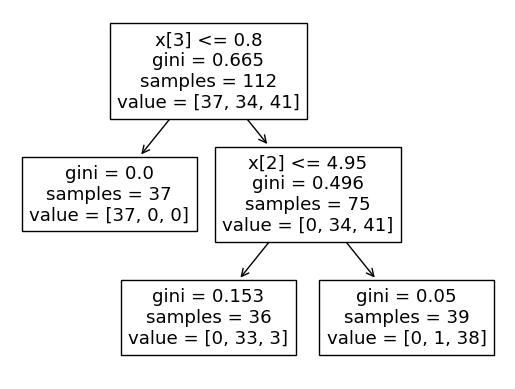

In [26]:
# Visualise decision tree using matplotlib
tree.plot_tree(clf)

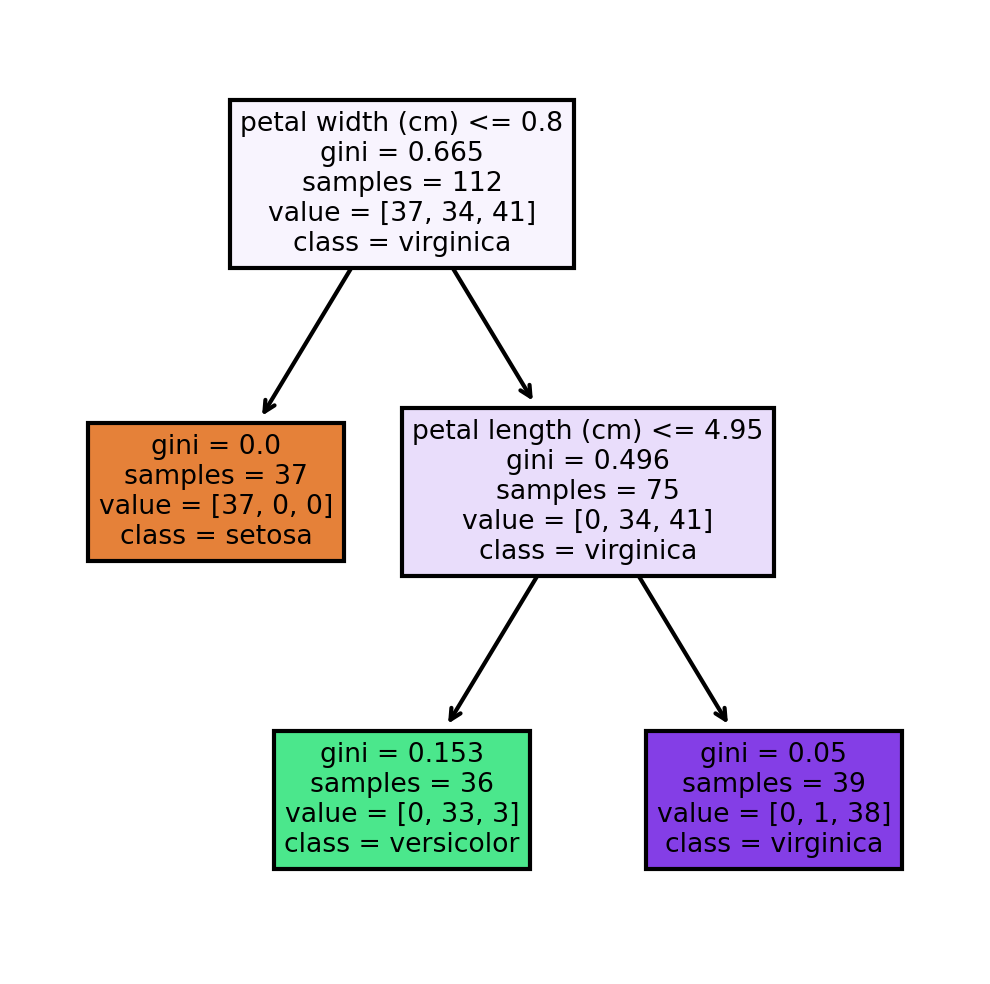

In [27]:
# Make it more interpretable
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
# fig.savefig('imagename.png')

In [28]:
# Export Model to a dot file
tree.export_graphviz(clf,
                     out_file="tree.dot",
                     feature_names = fn, 
                     class_names=cn,
                     filled = True)

In [29]:
#Fit a Random Forest Model using Scikit-Learn
# Load the Breast Cancer (Diagnostic) Dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
# Arrange Data into Features Matrix and Target Vector
X = df.loc[:, df.columns != 'target']
y = df.loc[:, 'target'].values
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0)
# Random Forests in `scikit-learn` (with N = 100)
rf = RandomForestClassifier(n_estimators=100,
                            random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [30]:
rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=209652396),
 DecisionTreeClassifier(max_features='sqrt', random_state=398764591),
 DecisionTreeClassifier(max_features='sqrt', random_state=924231285),
 DecisionTreeClassifier(max_features='sqrt', random_state=1478610112),
 DecisionTreeClassifier(max_features='sqrt', random_state=441365315),
 DecisionTreeClassifier(max_features='sqrt', random_state=1537364731),
 DecisionTreeClassifier(max_features='sqrt', random_state=192771779),
 DecisionTreeClassifier(max_features='sqrt', random_state=1491434855),
 DecisionTreeClassifier(max_features='sqrt', random_state=1819583497),
 DecisionTreeClassifier(max_features='sqrt', random_state=530702035),
 DecisionTreeClassifier(max_features='sqrt', random_state=626610453),
 DecisionTreeClassifier(max_features='sqrt', random_state=1650906866),
 DecisionTreeClassifier(max_features='sqrt', random_state=1879422756),
 DecisionTreeClassifier(max_features='sqrt', random_state=1277901399),
 DecisionTree

In [31]:
print(len(rf.estimators_))

100


In [32]:
rf.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=209652396)

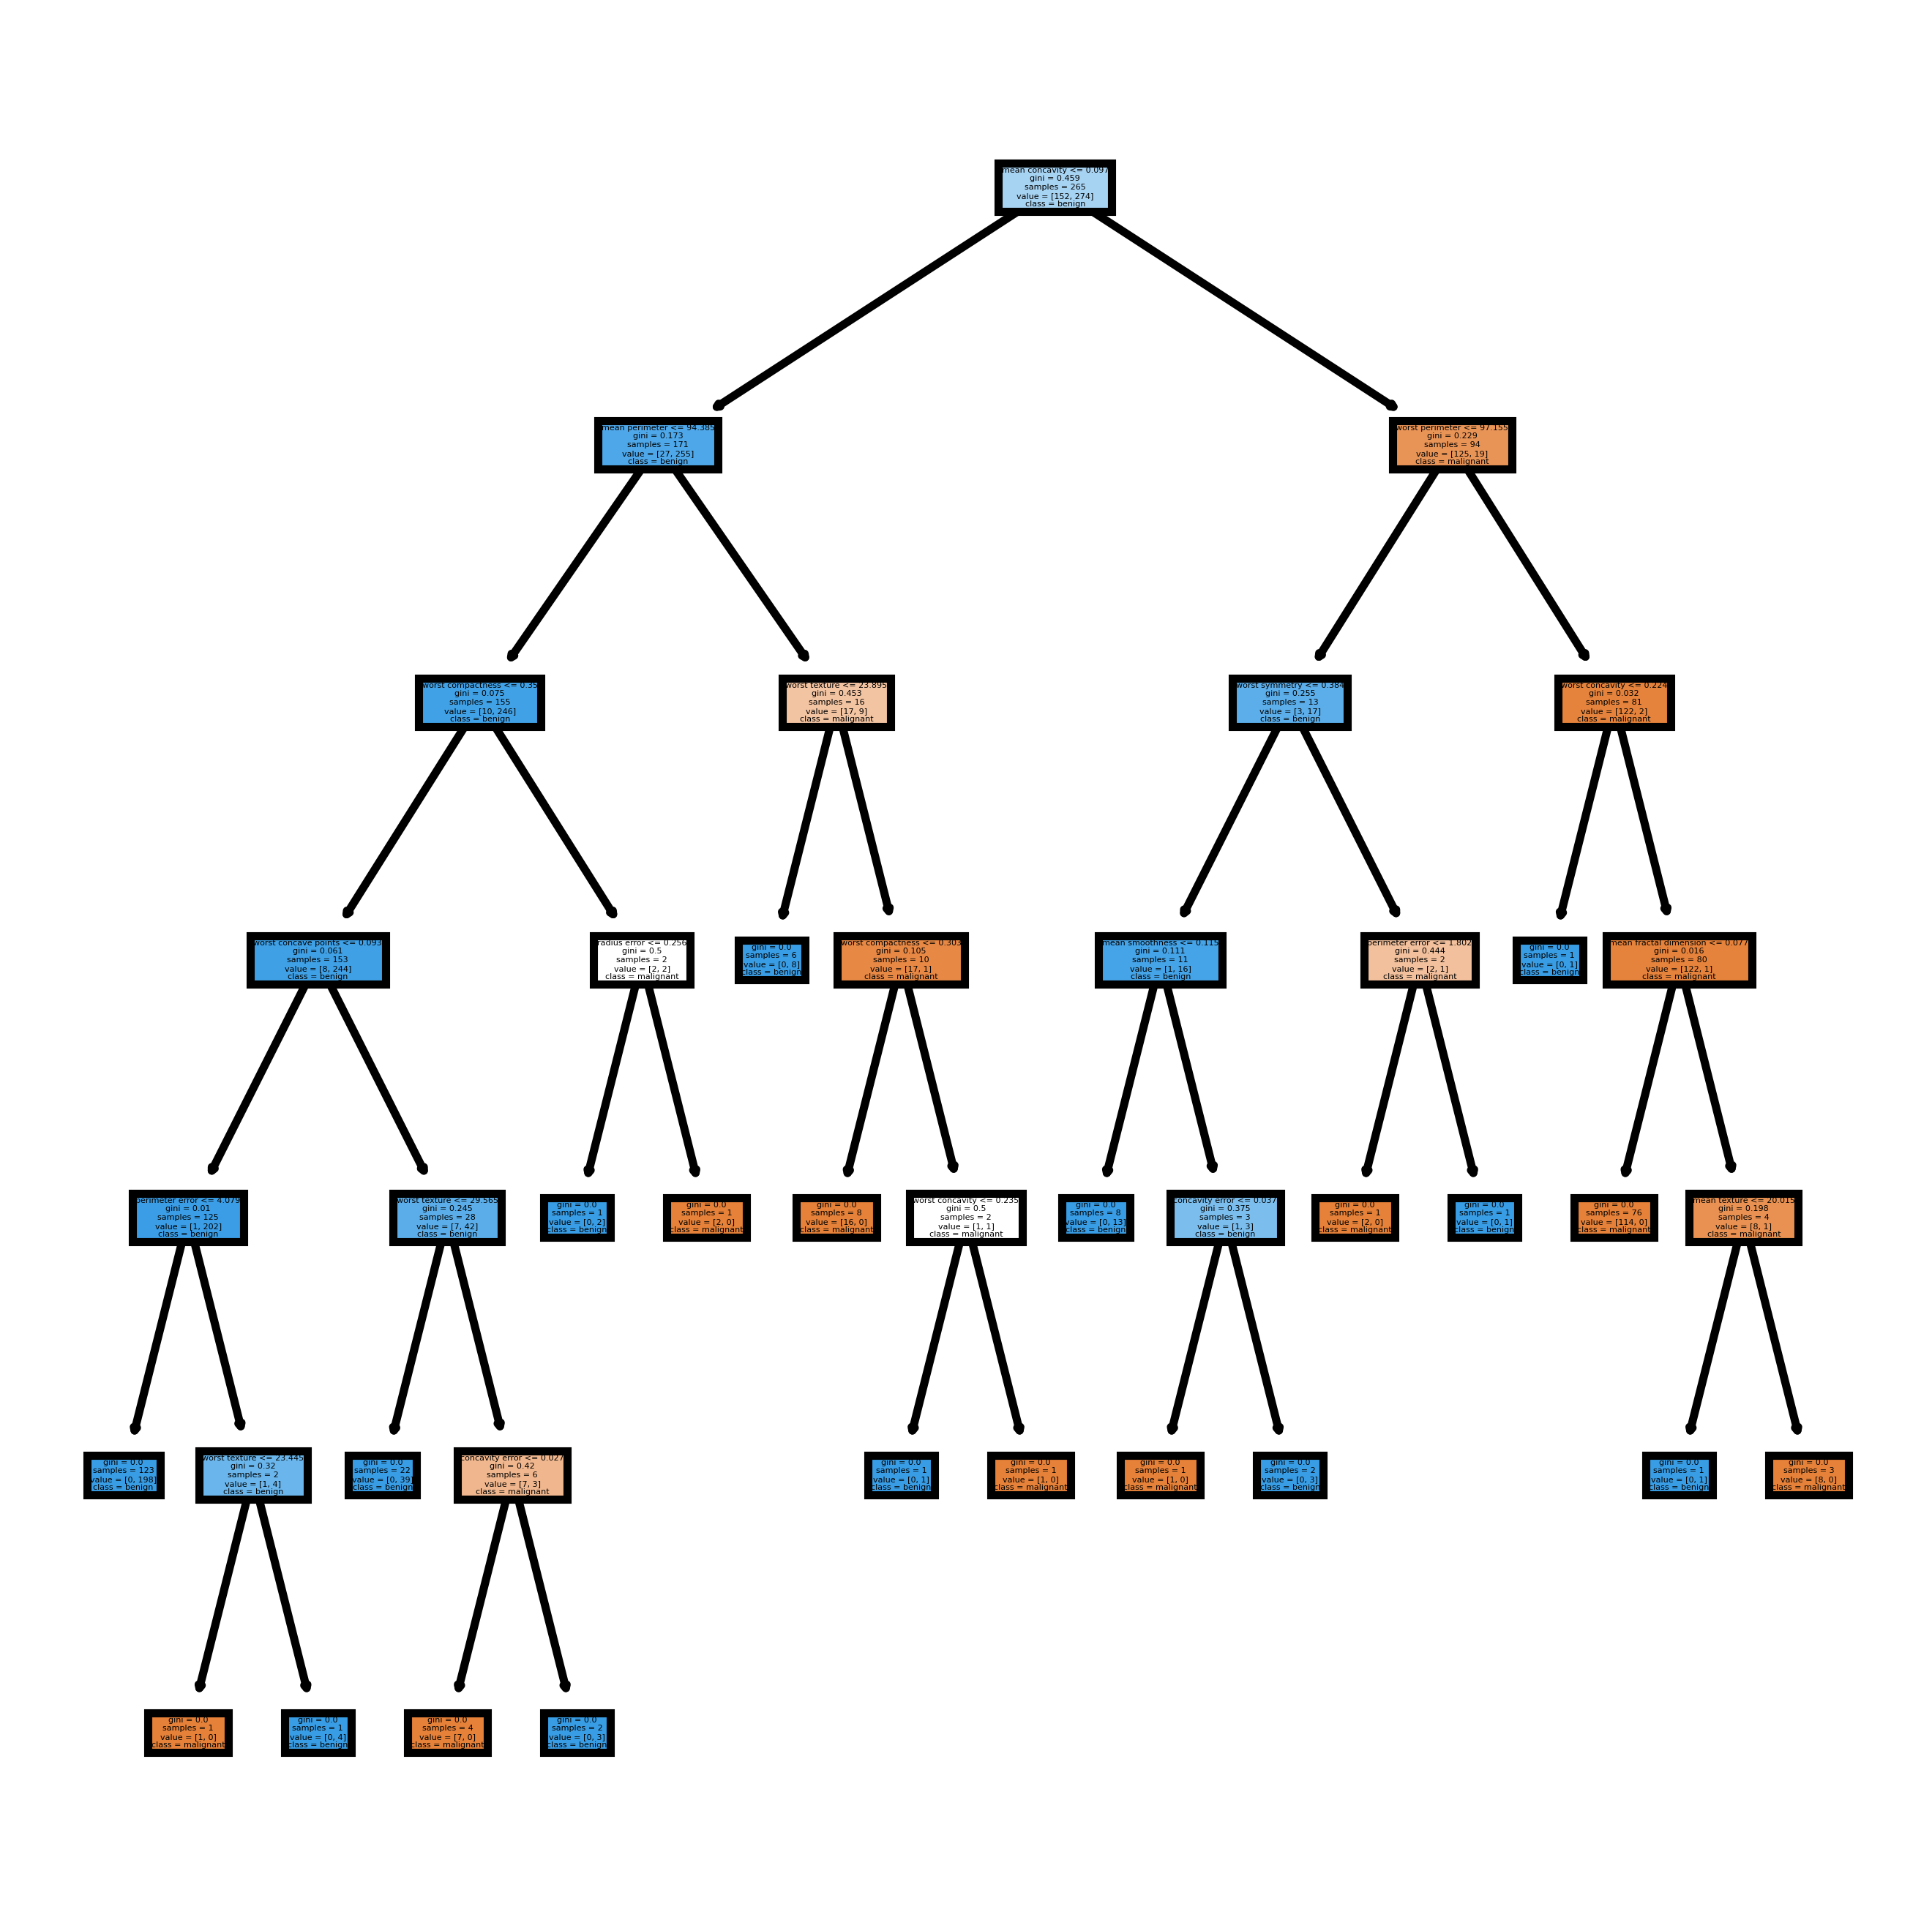

In [33]:
#Visualize the tree
fn=data.feature_names
cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
#fig.savefig('rf_individualtree.png')

In [34]:
# Visualize first 5 decision trees
# This may not the best way to view each estimator as it is small
fn=data.feature_names
cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=3000)
for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);
    
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

Output hidden; open in https://colab.research.google.com to view.

#Implement Example Data from lecture (buy computer case (14 data)) and visualise tree. 

In [67]:
#Import Libraries
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

In [71]:
from csv import reader

# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

# load and prepare data
filename = 'buy_computer.csv'
data = load_csv(filename)
column_names = ['age', 'income', 'student', 'credit_rating', 'buys_computer']
df = pd.DataFrame(data, columns=column_names)
df

,age,income,student,credit_rating,buys_computer
0,﻿<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31 to 40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31 to 40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [72]:
# find the unique values for each column
for col in df.columns:
    print(col, df[col].unique())

age ['\ufeff<=30' '<=30' '31 to 40' '>40']
income ['high' 'medium' 'low']
student ['no' 'yes']
credit_rating ['fair' 'excellent']
buys_computer ['no' 'yes']


In [73]:
# Replace string value with float
df['age'] = df['age'].replace(['\ufeff<=30', '<=30'], 0)
df['age'] = df['age'].replace(['31 to 40'], 1)
df['age'] = df['age'].replace(['>40'], 2)

df['income']= df['income'].replace(['low'], 0) 
df['income']= df['income'].replace(['medium'], 1)
df['income']= df['income'].replace(['high'], 2)

computer_x = df.drop('buys_computer', axis=1)
computer_y = df['buys_computer']
computer_x_encoded = pd.get_dummies(computer_x, drop_first=True)
computer_x_encoded

,age,income,student_yes,credit_rating_fair
0,0,2,0,1
1,0,2,0,0
2,1,2,0,1
3,2,1,0,1
4,2,0,1,1
5,2,0,1,0
6,1,0,1,0
7,0,1,0,1
8,0,0,1,1
9,2,1,1,1


In [75]:
from sklearn.model_selection import train_test_split
# Splitting data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(computer_x_encoded, computer_y, random_state=0)

In [76]:
# Modelling
# Step 1: Import the model you want to use
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Step 2: Make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)
# Step 3: Train the model on the data
clf.fit(X_train, Y_train)
# Step 4: Predict labels of unseen (test) data
predicitions = clf.predict(X_test)
acc = accuracy_score(Y_test, predicitions)
acc

0.25

[Text(0.5, 0.8333333333333334, 'x[3] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.5, 'x[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.75, 0.5, 'x[0] <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

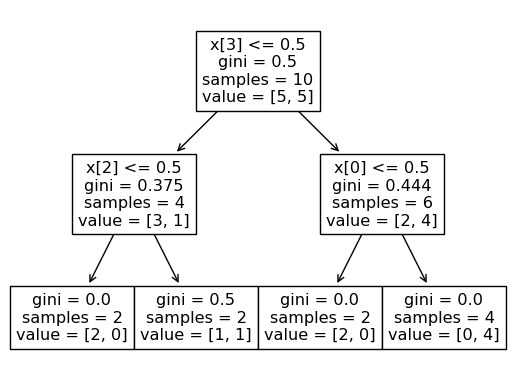

In [77]:
# Visualise decision tree using matplotlib
tree.plot_tree(clf)

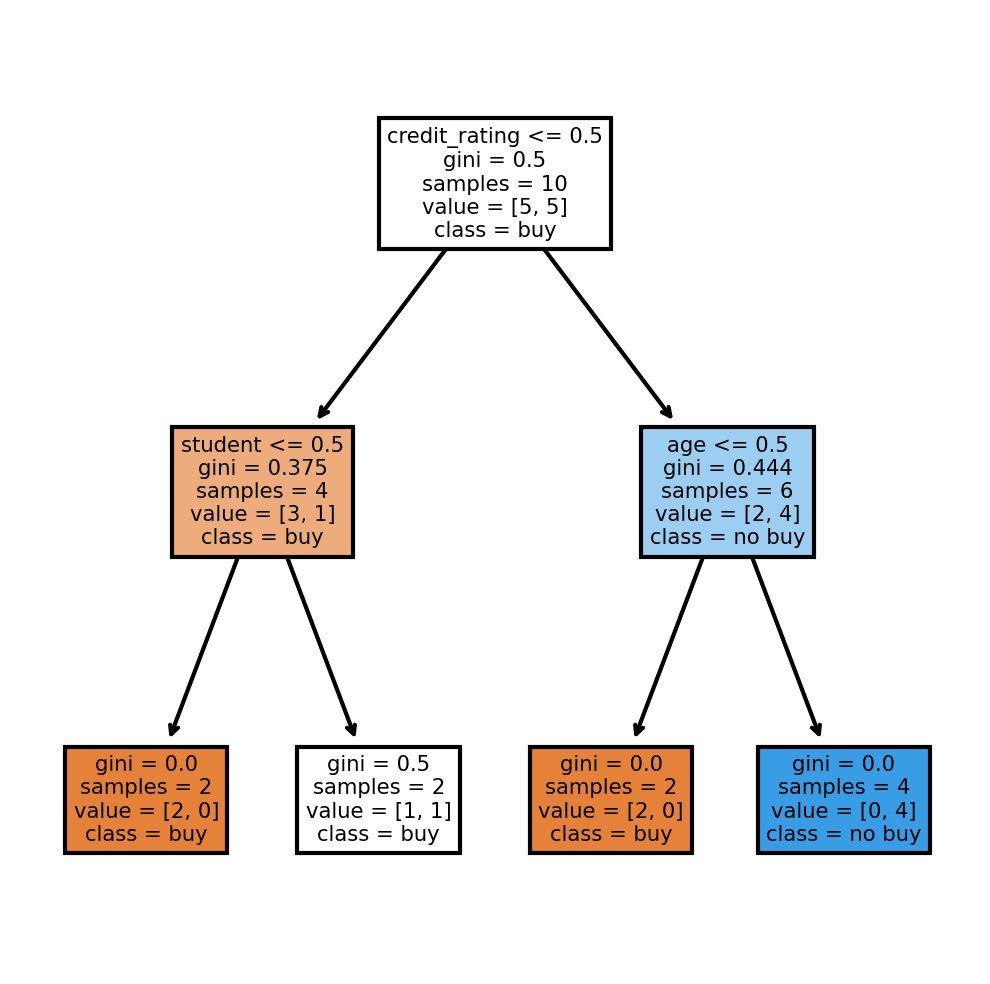

In [78]:
# Make it more interpretable
fn=['age','income','student','credit_rating']
cn=['buy', 'no buy']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
# fig.savefig('imagename.png')

In [79]:
# Random Forests in `scikit-learn` (with N = 100)
rf = RandomForestClassifier(n_estimators=100,
                            random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [80]:
rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=209652396),
 DecisionTreeClassifier(max_features='sqrt', random_state=398764591),
 DecisionTreeClassifier(max_features='sqrt', random_state=924231285),
 DecisionTreeClassifier(max_features='sqrt', random_state=1478610112),
 DecisionTreeClassifier(max_features='sqrt', random_state=441365315),
 DecisionTreeClassifier(max_features='sqrt', random_state=1537364731),
 DecisionTreeClassifier(max_features='sqrt', random_state=192771779),
 DecisionTreeClassifier(max_features='sqrt', random_state=1491434855),
 DecisionTreeClassifier(max_features='sqrt', random_state=1819583497),
 DecisionTreeClassifier(max_features='sqrt', random_state=530702035),
 DecisionTreeClassifier(max_features='sqrt', random_state=626610453),
 DecisionTreeClassifier(max_features='sqrt', random_state=1650906866),
 DecisionTreeClassifier(max_features='sqrt', random_state=1879422756),
 DecisionTreeClassifier(max_features='sqrt', random_state=1277901399),
 DecisionTree

In [81]:
print(len(rf.estimators_))

100


In [82]:
rf.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=209652396)

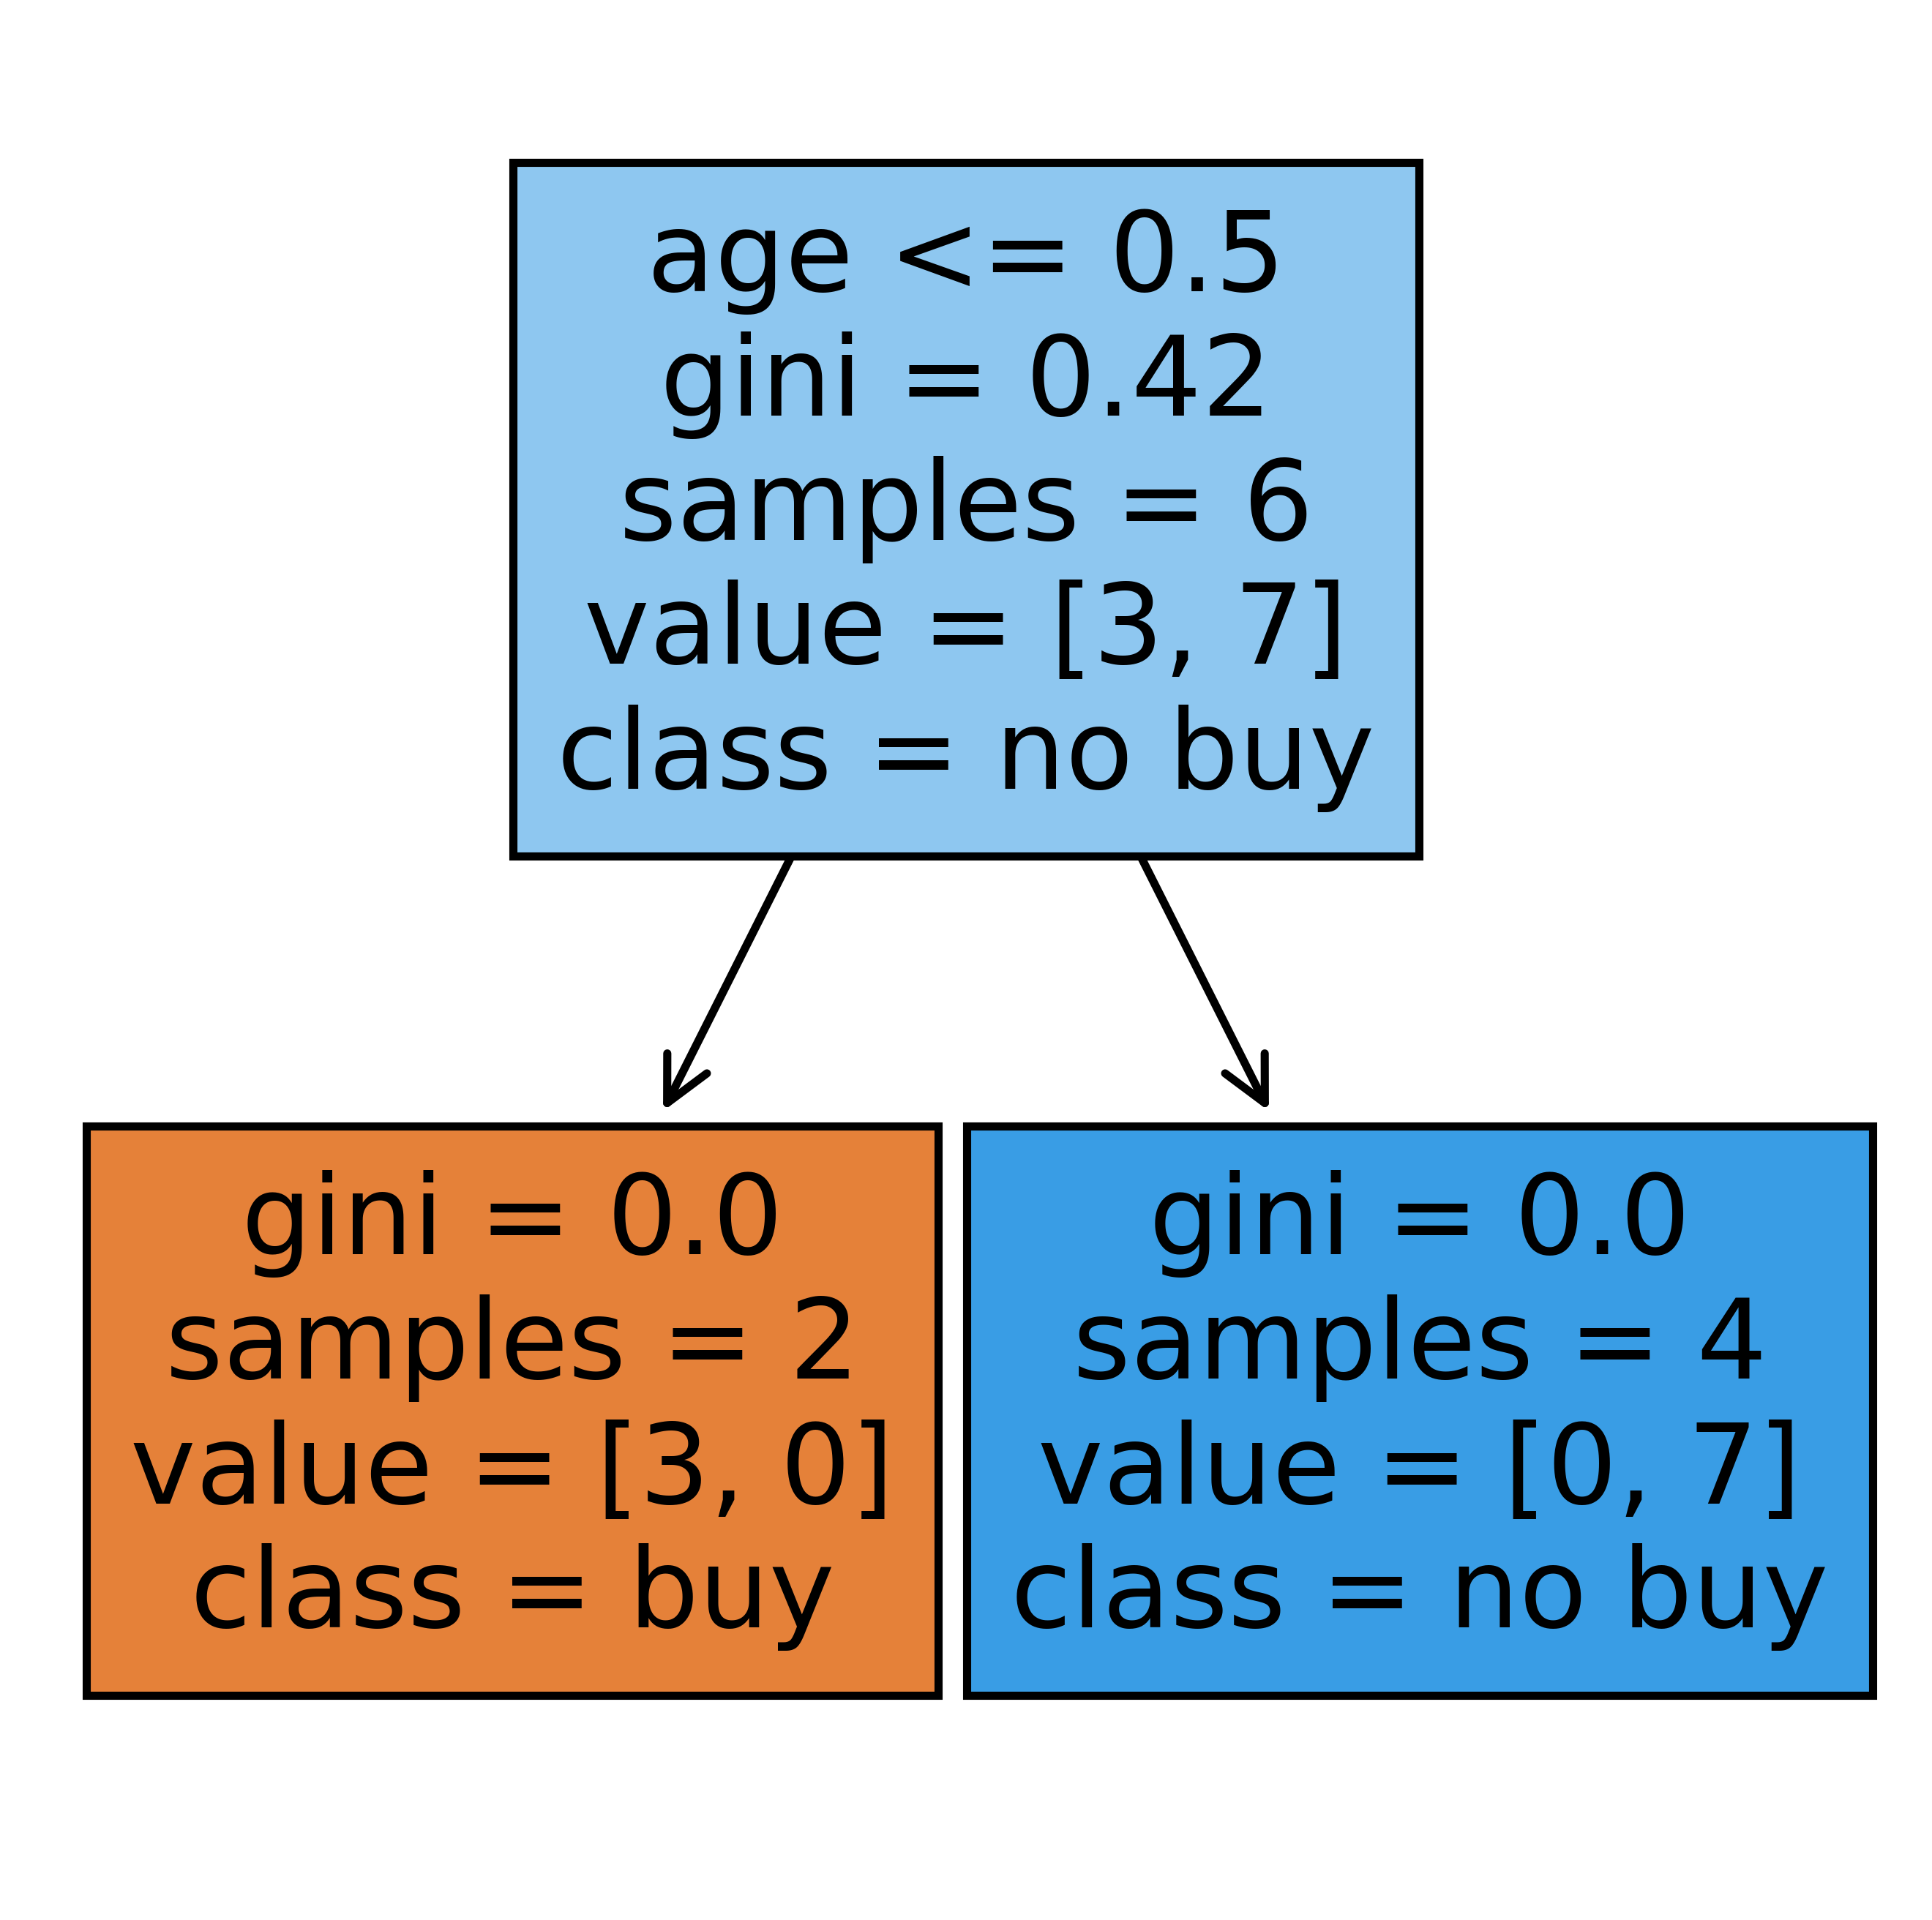

In [84]:
#Visualize the tree
fn=['age','income','student','credit_rating']
cn=['buy', 'no buy']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
#fig.savefig('rf_individualtree.png')